In [37]:
# Exercise 1

import numpy as np
from numpy import log
import scipy as sp
from numpy import *

def rom(f,x,jb,kb): # Calculates the Romberg integral of f over the set of points x
    R = [[0 for i in range(jb+1)] for i in range(jb+1)]
    R[1][1] = (x[-1] - x[0])*(f(x[0]) + f(x[-1])/2)
    for j in range(2,jb+1): 
        subtotal = 0
        hj = (x[-1]-x[0])/(2**(j-1))
        for i in range(1,2**(j-2) + 1):
            subtotal = subtotal + f(x[0] + (2 * i - 1) * hj)
        R[j][1] = 1/2 * R[j-1][1] + hj*subtotal
        for k in range(2,j+1): 
            R[j][k] = (4**(k-1)*R[j][k-1] - R[j-1][k-1])/(4**(k-1)-1)
    return R[jb][kb]

def f(x): 
    return sin(sqrt(100*x))**2

def err(f,x,i): 
    m = 1
    return 1/(4**m - 1)*(rom(f,x,i,m) - rom(f,x,i-1,m))


def errbound(f,x,deserr): 
    i = 2
    breakcount = 0
    while abs(err(f,x,i)) > deserr:
        breakcount += 1
        if breakcount > 100: 
            break
        i += 1
    return i


x = np.linspace(1,2,10000)
y = f(x)

print(errbound(f,x,10**(-6)))
print("Error is ", abs(err(f,x,17)))
print("Integral is ",rom(f,x,17,1))

print("But Scipy says ", sp.integrate.simpson(y,x=x))



17
Error is  7.525733309495426e-07
Integral is  0.5498722684151318
But Scipy says  0.5498700105163535


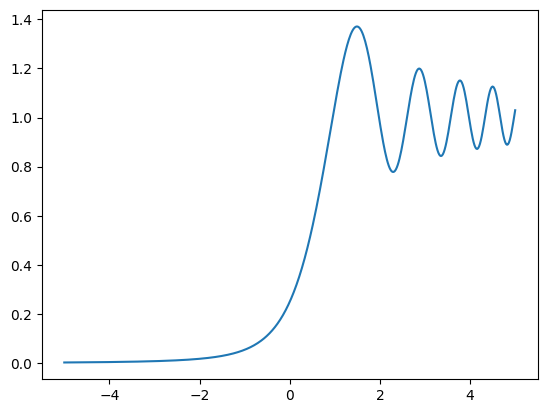

In [75]:
# Exercise 2


from numpy import sin,cos,sqrt,pi
lambd = 1
z = 3
x = np.linspace(-5,5,500)

def C(u):
    def func(t): 
        return cos(1/2 * pi * t**2)
    integral, error = sp.integrate.quadrature(func,0,u)
    return integral

def S(u): 
    def func(t): 
        return sin(1/2 * pi * t**2)
    integral, error = sp.integrate.quadrature(func,0,u)
    return integral

def I(x): 
    u = x * sqrt(2/(lambd*z))
    I = 1/8 * ((2*C(u) + 1)**2 + (2*S(u) + 1)**2)
    return I


Ilist = [I(i) for i in x]
    
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(x,Ilist)

In [38]:
# Exercise 5.3

#b. 

from scipy.integrate import quadrature
from scipy.integrate import simpson
from numpy import *


def f(z):   
    if (z == 0): 
        return 0
    else: 
        return 1/(1-z)**2 * (((z)/(1-z))**3)/(exp(z/(1-z)) - 1)
    
def trapz(x,y): 
    N = 50
    h = (x[-1] - x[0])/(N)
    sum = 0
    for i in x: 
        sum += y(i)
    sum -= y(x[-1])/2 + y(x[0])/2
    
    return (h/2)*sum

x = np.linspace(0,.99,50)
np.delete(x,-1)
y = [f(i) for i in x]

print(2*trapz(x,f))
print(simpson(y,x))



6.364063824313145
6.49394341665298


0.0 0.0
rms position is  2.3450555732778984


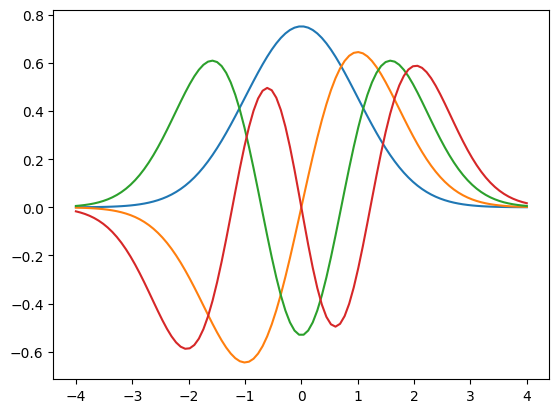

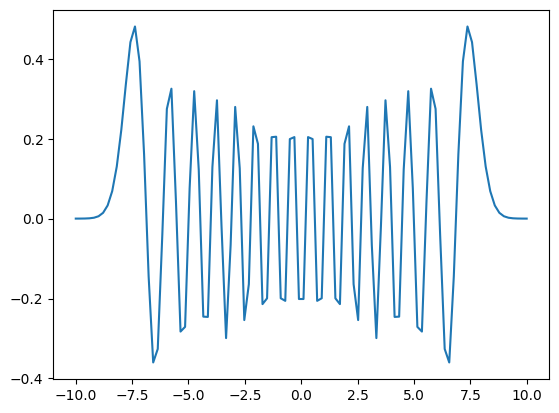

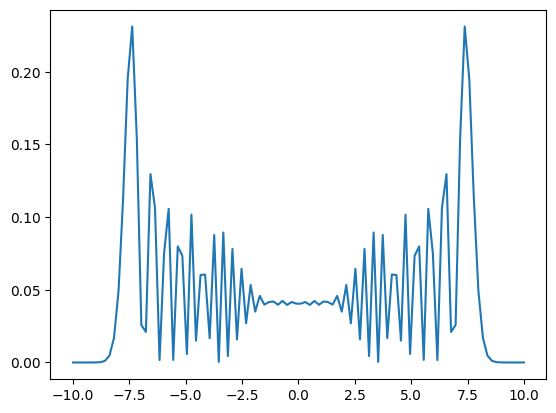

In [72]:
# Exercise 5.4

#a. 

import numpy as np
from math import factorial,pi
import matplotlib.pyplot as plt
from scipy.integrate import quadrature
from numpy import *


def H(n,x): 
    H = [1,2*x]
    N = 2
    while N <= n: 
        H.append( 2*x*H[N-1] - 2 * (N-1) * H[N-2] )
        N += 1
    return(H[n])
    
def psi(H,n,x): 
    return (1/(np.sqrt(2**n * factorial(n)*np.sqrt(pi)))) * np.exp((-x**2) / 2) *H(n,x)
    

fig,ax = plt.subplots()

x = np.linspace(-4,4,100)
y0 = [psi(H,0,i) for i in x]
y1 = [psi(H,1,i) for i in x]
y2 = [psi(H,2,i) for i in x]
y3 = [psi(H,3,i) for i in x]

ax.plot(x,y0)
ax.plot(x,y1)
ax.plot(x,y2)
ax.plot(x,y3)

#b. 

x = np.linspace(-10,10,100)
y = [psi(H,30,i) for i in x]
fig, ax2 = plt.subplots()
ax2.plot(x,y)

#c. 

prob = [i**2 for i in y]
fig,axprob = plt.subplots()
axprob.plot(x,prob)

# d. 

def avgpos(n): 
    def posint(x): 
        return x*psi(H,n,x)**2
    return quadrature(posint,-1000,1000)

pos,err = avgpos(5)

print(pos,err)

# e. 

def posrms(n): 
    def posrmsint(x): 
        return x**2 * psi(H,n,x)**2
    return sqrt(quadrature(posrmsint,-10,10))



pos,err = posrms(5)

print("rms position is ",pos)
